<a href="https://colab.research.google.com/github/akhilsivanand/SNW-PRJT/blob/master/Copy_of_Siamese_Dual_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers


     |████████████████████████████████| 778kB 6.8MB/s 
     |████████████████████████████████| 3.0MB 19.1MB/s 
     |████████████████████████████████| 890kB 41.5MB/s 
     |████████████████████████████████| 1.1MB 39.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=222f98365247b5abb3c10ba5a8425e4bcef1036b7a398bf3a974ce21c93969ee
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import itertools
import random
import os

from transformers import TFAutoModel, AutoTokenizer, BertConfig, TFBertModel

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

In [ ]:

from google.colab import files
uploaded = files.upload()


Saving USER.csv to USER.csv


In [ ]:
import io
dfTickets = pd.read_csv(io.BytesIO(uploaded['USER.csv']))

In [ ]:
df = dfTickets
df

,Unnamed: 0,Number,Short description,Assignment group,Close notes,Tags,Classification
0,0,INC3860455,SAS Permission issue in BI LAYER Production a...,AZTEC.GAP.PAAS-SAS-CL-2ND,Issue Description: SAS Permission issue in BI ...,AZ Technology,SAS GPFS
1,1,INC3800702,SAS EG error | workspace server failure,AZTEC.GAP.PAAS-SAS-CL-2ND,IT: Access Issue.\r\nD: SAS EG error | workspa...,AZ Reinsurance,SAS Platform Access/Availability
2,2,INC4789792,Extend Technical Users,AZTEC.GAP.PAAS-SAS-CL-2ND,Issue Description:Extend Technical Users\r\nTy...,AZ Technology,SAS Access Issue
3,3,INC3308102,Request for information regarding jobs,AZTEC.GAP.PAAS-SAS-CL-2ND,REQ0807777,AZ Technology,SAS Service Requests
4,4,INC4216556,Datenrestore SAS BI (PaaS) Deutschland,AZTEC.GAP.PAAS-SAS-CL-2ND,Description : Data restore\r\nType : Service ...,AZ Germany,SAS Service Requests
...,...,...,...,...,...,...,...
1192,1217,INC4403047,Lost access to BIFI Tools for 3 users.,AZTEC.GAP.PAAS-SAS-CL-2ND,Incident Description: Lost access to BIFI Tool...,AZ France,SAS Access Issue
1193,1218,INC2642993,Unable to connect to TDBPCE project using SAS EG,AZTEC.GAP.PAAS-SAS-CL-2ND,The user was missing the required unix groups....,AZ Reinsurance,SAS Access Issue
1194,1219,INC3501151,SAS got frozen,AZTEC.GAP.PAAS-SAS-CL-2ND,"Dear ZB,\r\nThanks for your mail confirmation ...",AZ Reinsurance,SAS Access Issue
1195,1220,INC3589899,Unable to connect to REDWH from SAS EG,AZTEC.GAP.PAAS-SAS-CL-2ND,We have guided user to submit a GIAM request t...,AZ Reinsurance,SAS Access Issue


In [ ]:
# def cleanDataset(dataset, columnsToClean, regexList):
#     for column in columnsToClean:
#         for regex in regexList:
#             dataset[column] = removeString(dataset[column], regex)
#     return dataset


# def removeString(data, regex):
#     return data.str.lower().str.replace(regex, ' ')

In [ ]:
# def getRegexList():
#     regexList = []

#     regexList += ['^[_a-z0-9-]+(\.[_a-z0-9-]+)*@[a-z0-9-]+(\.[a-z0-9-]+)*(\.[a-z]{2,4})$']
#     regexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+']
#     regexList += ['[^a-zA-Z]']

#     return regexList

In [ ]:
listOfStr = [' SAS Server Issue', ' SAS Platform Access/Availability',
       ' SAS Access Issue', ' SAS Service Requests', ' SAS Backup', ' SAS GPFS',
       ' SAS -   UC4  Job Issues', ' SAS - Space Issue',
       ' SAS Grafana Alert', ' SAS AVC Client Issue',
       ' SAS Database', ' SAS Performance',
       ' SAS AVC Client Issue - Vitualization',
       ' SAS Portal issue',
       ' sas Backup']
map_label = { i : listOfStr[i] for i in range(0, len(listOfStr) ) }

In [ ]:
map_label

{0: ' SAS Server Issue',
 1: ' SAS Platform Access/Availability',
 2: ' SAS Access Issue',
 3: ' SAS Service Requests',
 4: ' SAS Backup',
 5: ' SAS GPFS',
 6: ' SAS -   UC4  Job Issues',
 7: ' SAS - Space Issue',
 8: ' SAS Grafana Alert',
 9: ' SAS AVC Client Issue',
 10: ' SAS Database',
 11: ' SAS Performance',
 12: ' SAS AVC Client Issue - Vitualization',
 13: ' SAS Portal issue',
 14: ' sas Backup'}

In [ ]:
df = df.loc[df['Classification'].isin(listOfStr)]

In [ ]:
df

,Unnamed: 0,Number,Short description,Assignment group,Close notes,Tags,Classification
0,0,INC3860455,SAS Permission issue in BI LAYER Production a...,AZTEC.GAP.PAAS-SAS-CL-2ND,Issue Description: SAS Permission issue in BI ...,AZ Technology,SAS GPFS
1,1,INC3800702,SAS EG error | workspace server failure,AZTEC.GAP.PAAS-SAS-CL-2ND,IT: Access Issue.\r\nD: SAS EG error | workspa...,AZ Reinsurance,SAS Platform Access/Availability
2,2,INC4789792,Extend Technical Users,AZTEC.GAP.PAAS-SAS-CL-2ND,Issue Description:Extend Technical Users\r\nTy...,AZ Technology,SAS Access Issue
3,3,INC3308102,Request for information regarding jobs,AZTEC.GAP.PAAS-SAS-CL-2ND,REQ0807777,AZ Technology,SAS Service Requests
4,4,INC4216556,Datenrestore SAS BI (PaaS) Deutschland,AZTEC.GAP.PAAS-SAS-CL-2ND,Description : Data restore\r\nType : Service ...,AZ Germany,SAS Service Requests
...,...,...,...,...,...,...,...
1191,1216,INC2984010,PROD COP (SLA13002),AZTEC.GAP.PAAS-SAS-CL-2ND,The request was completed,AZ France,SAS Server Issue
1192,1217,INC4403047,Lost access to BIFI Tools for 3 users.,AZTEC.GAP.PAAS-SAS-CL-2ND,Incident Description: Lost access to BIFI Tool...,AZ France,SAS Access Issue
1193,1218,INC2642993,Unable to connect to TDBPCE project using SAS EG,AZTEC.GAP.PAAS-SAS-CL-2ND,The user was missing the required unix groups....,AZ Reinsurance,SAS Access Issue
1194,1219,INC3501151,SAS got frozen,AZTEC.GAP.PAAS-SAS-CL-2ND,"Dear ZB,\r\nThanks for your mail confirmation ...",AZ Reinsurance,SAS Access Issue


In [ ]:
# columnsToClean = ['Short description']

In [ ]:
# df =cleanDataset(df, columnsToClean, getRegexList())

In [ ]:
df['Classification'] = df['Classification'].factorize()[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Classification'] 

0       0
1       1
2       2
3       3
4       3
       ..
1191    6
1192    2
1193    2
1194    2
1195    2
Name: Classification, Length: 982, dtype: int64

In [ ]:
df

,Unnamed: 0,Number,Short description,Assignment group,Close notes,Tags,Classification
0,0,INC3860455,SAS Permission issue in BI LAYER Production a...,AZTEC.GAP.PAAS-SAS-CL-2ND,Issue Description: SAS Permission issue in BI ...,AZ Technology,0
1,1,INC3800702,SAS EG error | workspace server failure,AZTEC.GAP.PAAS-SAS-CL-2ND,IT: Access Issue.\r\nD: SAS EG error | workspa...,AZ Reinsurance,1
2,2,INC4789792,Extend Technical Users,AZTEC.GAP.PAAS-SAS-CL-2ND,Issue Description:Extend Technical Users\r\nTy...,AZ Technology,2
3,3,INC3308102,Request for information regarding jobs,AZTEC.GAP.PAAS-SAS-CL-2ND,REQ0807777,AZ Technology,3
4,4,INC4216556,Datenrestore SAS BI (PaaS) Deutschland,AZTEC.GAP.PAAS-SAS-CL-2ND,Description : Data restore\r\nType : Service ...,AZ Germany,3
...,...,...,...,...,...,...,...
1191,1216,INC2984010,PROD COP (SLA13002),AZTEC.GAP.PAAS-SAS-CL-2ND,The request was completed,AZ France,6
1192,1217,INC4403047,Lost access to BIFI Tools for 3 users.,AZTEC.GAP.PAAS-SAS-CL-2ND,Incident Description: Lost access to BIFI Tool...,AZ France,2
1193,1218,INC2642993,Unable to connect to TDBPCE project using SAS EG,AZTEC.GAP.PAAS-SAS-CL-2ND,The user was missing the required unix groups....,AZ Reinsurance,2
1194,1219,INC3501151,SAS got frozen,AZTEC.GAP.PAAS-SAS-CL-2ND,"Dear ZB,\r\nThanks for your mail confirmation ...",AZ Reinsurance,2


In [ ]:
### UTILITY FUNCTIONS FOR TOKENIZATIONS, MASKS AND SEGMENTS CREATION ###
### from: https://www.kaggle.com/akensert/bert-base-tf2-0-now-huggingface-transformer

def convert_to_transformer_inputs(str1, str2, tokenizer, max_sequence_length, double=True):
    
    def return_id(str1, str2, truncation_strategy, length):

        inputs = tokenizer.encode_plus(str1, str2,
            add_special_tokens=True,
            max_length=length,
            truncation_strategy=truncation_strategy)
        
        input_ids =  inputs["input_ids"]
        input_masks = [1] * len(input_ids)
        input_segments = inputs["token_type_ids"]
        
        padding_length = length - len(input_ids)
        padding_id = tokenizer.pad_token_id
        
        input_ids = input_ids + ([padding_id] * padding_length)
        input_masks = input_masks + ([0] * padding_length)
        input_segments = input_segments + ([0] * padding_length)
        
        return [input_ids, input_masks, input_segments]
    
    if double:
    
        input_ids_1, input_masks_1, input_segments_1 = return_id(
            str1, None, 'longest_first', max_sequence_length)

        input_ids_2, input_masks_2, input_segments_2 = return_id(
            str2, None, 'longest_first', max_sequence_length)

        return [input_ids_1, input_masks_1, input_segments_1,
                input_ids_2, input_masks_2, input_segments_2]
    
    else:
        
        input_ids, input_masks, input_segments = return_id(
            str1, str2, 'longest_first', max_sequence_length)

        return [input_ids, input_masks, input_segments,
                None, None, None]        

def compute_input_arrays(df, columns, tokenizer, max_sequence_length, double=True):
    
    input_ids_1, input_masks_1, input_segments_1 = [], [], []
    input_ids_2, input_masks_2, input_segments_2 = [], [], []
    for _, instance in tqdm(df[columns].iterrows(), total=len(df)):
        str1, str2 = instance[columns[0]], instance[columns[1]]

        ids_1, masks_1, segments_1, ids_2, masks_2, segments_2 = \
        convert_to_transformer_inputs(str1, str2, tokenizer, max_sequence_length, double=double)
        
        input_ids_1.append(ids_1)
        input_masks_1.append(masks_1)
        input_segments_1.append(segments_1)

        input_ids_2.append(ids_2)
        input_masks_2.append(masks_2)
        input_segments_2.append(segments_2)
        
    if double:
        
        return [np.asarray(input_ids_1, dtype=np.int32), 
                np.asarray(input_masks_1, dtype=np.int32), 
                np.asarray(input_segments_1, dtype=np.int32),
                np.asarray(input_ids_2, dtype=np.int32), 
                np.asarray(input_masks_2, dtype=np.int32), 
                np.asarray(input_segments_2, dtype=np.int32)]
    
    else:
        
        return [np.asarray(input_ids_1, dtype=np.int32), 
                np.asarray(input_masks_1, dtype=np.int32), 
                np.asarray(input_segments_1, dtype=np.int32)]

In [ ]:
### TRAIN TEST SPLIT ###

X_train, X_test, y_train, y_test = train_test_split(df[['Number','Short description']], df['Classification'].values, 
                                                    random_state=33, test_size = 0.3)


print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(687, 2) (295, 2)
(687,) (295,)


In [ ]:
X_train

,Number,Short description
369,INC2742369,SAS - Missing Permission
269,INC2541642,Issu with programm running
380,INC4356813,Can You please add me and my colleagues (Laszl...
283,INC4246677,'SAS DEV environment stopped working. Now is w...
756,INC2478821,Win7 - SAS Enterprise Guide - Server nicht ver...
...,...,...
794,INC2840055,SAS: Copy AUTHDOMAIN
701,INC4124580,Excel file can not be opened in SAS
873,INC4375543,(R) Incompatibility problems of SAS AVC package
481,INC3008291,SAS - Application Virtualization Fehler - Anwe...


In [ ]:

### IMPORT TOKENIZER ###

MAX_SEQUENCE_LENGTH = 300

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# **SIMPLE BERT (ONE INPUT)**

In [ ]:
### CREATE SEQUENCES (id, mask, segments) FOR TRAIN AND TEST ###

input_train = compute_input_arrays(X_train, ['Number','Short description'], tokenizer, MAX_SEQUENCE_LENGTH, double=False)
input_test = compute_input_arrays(X_test, ['Number','Short description'], tokenizer, MAX_SEQUENCE_LENGTH, double=False)

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

In [ ]:
def simple_bert():
    
    opt = Adam(learning_rate=2e-5)
    
    id_ = Input((MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    mask_ = Input((MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    atn_ = Input((MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    
    config = BertConfig()
    config.output_hidden_states = False # Set to True to obtain hidden states
    bert_model = TFBertModel.from_pretrained('bert-base-uncased', config=config)
    
    embedding = bert_model(id_, attention_mask=mask_, token_type_ids=atn_)[0]
    
    x = GlobalAveragePooling1D()(embedding)    
    x = Dropout(0.2)(x)
    out = Dense(len(map_label), activation='softmax')(x)

    model = Model(inputs=[id_, mask_, atn_], outputs=out)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt)
    
    return model

In [ ]:
tf.random.set_seed(33)
os.environ['PYTHONHASHSEED'] = str(33)
np.random.seed(33)
random.seed(33)

session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1, 
    inter_op_parallelism_threads=1
)
sess = tf.compat.v1.Session(
    graph=tf.compat.v1.get_default_graph(), 
    config=session_conf
)
tf.compat.v1.keras.backend.set_session(sess)

model = simple_bert()
model.fit(input_train, y_train, epochs=11, batch_size=6)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/11
115/115 [==============================] - 90s 779ms/step - loss: 2.0467
Epoch 2/11
115/115 [==============================] - 89s 778ms/step - loss: 1.3284
Epoch 3/11
115/115 [==============================] - 89s 778ms/step - loss: 0.7970
Epoch 4/11
115/115 [==============================] - 89s 778ms/step - loss: 0.4475
Epoch 5/11
115/115 [==============================] - 90s 779ms/step - loss: 0.2769
Epoch 6/11
115/115 [==============================] - 89s 778ms/step - loss: 0.1460
Epoch 7/11
115/115 [==============================] - 89s 777ms/step - loss: 0.1275
Epoch 8/11
115/115 [==============================] - 89s 777ms/step - loss: 0.0807
Epoch 9/11
115/115 [==============================] - 89s 776ms/step - loss: 0.0889
Epoch 10/11
115/115 [==============================] - 89s 777ms/step - loss: 0.0678
Epoch 11/11
115/115 [==============================] - 89s 777ms/step - loss: 0.0554


In [ ]:
### PREDICT TEST ###

pred_test = np.argmax(model.predict(input_test), axis=1)

In [ ]:
print(classification_report([map_label[i] for i in y_test], [map_label[i] for i in pred_test]))

                                       precision    recall  f1-score   support

              SAS -   UC4  Job Issues       0.40      0.40      0.40        47
                    SAS - Space Issue       0.00      0.00      0.00         2
                 SAS AVC Client Issue       0.54      0.62      0.58        21
 SAS AVC Client Issue - Vitualization       1.00      1.00      1.00         4
                     SAS Access Issue       0.49      0.61      0.54        59
                           SAS Backup       0.75      0.60      0.67         5
                         SAS Database       0.93      1.00      0.96        13
                             SAS GPFS       0.44      0.36      0.40        11
                    SAS Grafana Alert       1.00      1.00      1.00         2
                      SAS Performance       0.47      0.47      0.47        15
     SAS Platform Access/Availability       0.24      0.28      0.26        25
                     SAS Portal issue       0.80   

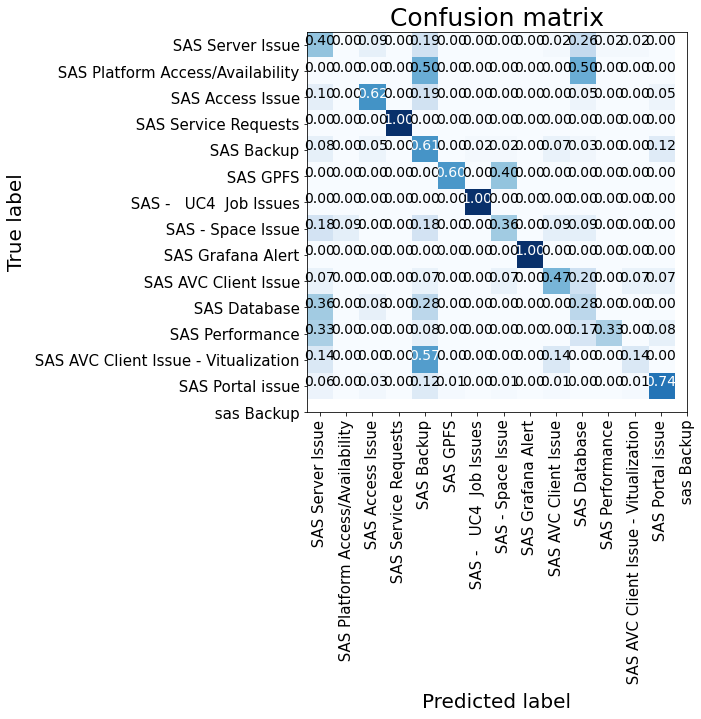

In [ ]:

cnf_matrix = confusion_matrix([map_label[i] for i in y_test], 
                              [map_label[i] for i in pred_test])

plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=list(map_label.values()))
plt.show()

In [ ]:
pip freeze


absl-py==0.9.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
argon2-cffi==20.1.0
asgiref==3.2.10
astor==0.8.1
astropy==4.0.1.post1
astunparse==1.6.3
atari-py==0.2.6
atomicwrites==1.4.0
attrs==19.3.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.1.5
blis==0.4.1
bokeh==2.1.1
boto==2.49.0
boto3==1.14.33
botocore==1.17.33
Bottleneck==1.3.2
branca==0.4.1
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.1.1
catalogue==1.0.0
certifi==2020.6.20
cffi==1.14.1
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.4.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.1
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda101==7.4.0
cvxopt==1.2.5
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.3
Cython==0.29.21
daft==0.0.4
dask==2.12.0
dataclasses==0.7
datascience==0.10.6
decorator==4.4.2
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.2
distributed==1.25.3
Django==3.0.8
dlib==19.18.0

In [ ]:
import keras

In [41]:
model.save_weights('bert_weights.h5')

In [43]:
model.load_weights('bert_weights.h5')

# New Section

In [ ]:
from google.colab import files
files.download(bert_weights.h5)

NameError: ignored

# **DUAL BERT (TWO INPUT)**

In [ ]:
### CREATE SEQUENCES (id, mask, segments) FOR TRAIN AND TEST ###

input_train = compute_input_arrays(X_train, ['headline','short_description'], tokenizer, MAX_SEQUENCE_LENGTH)
input_test = compute_input_arrays(X_test, ['headline','short_description'], tokenizer, MAX_SEQUENCE_LENGTH)

In [ ]:
def dual_bert():
    
    opt = Adam(learning_rate=2e-5)
    
    id1 = Input((MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    id2 = Input((MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    
    mask1 = Input((MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    mask2 = Input((MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    
    atn1 = Input((MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    atn2 = Input((MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    
    config = BertConfig() 
    config.output_hidden_states = False # Set to True to obtain hidden states
    bert_model1 = TFBertModel.from_pretrained('bert-base-uncased', config=config)
    bert_model2 = TFBertModel.from_pretrained('bert-base-uncased', config=config)
    
    embedding1 = bert_model1(id1, attention_mask=mask1, token_type_ids=atn1)[0]
    embedding2 = bert_model2(id2, attention_mask=mask2, token_type_ids=atn2)[0]
    
    x1 = GlobalAveragePooling1D()(embedding1)
    x2 = GlobalAveragePooling1D()(embedding2)
    
    x = Concatenate()([x1, x2])
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    out = Dense(len(map_label), activation='softmax')(x)

    model = Model(inputs=[id1, mask1, atn1, id2, mask2, atn2], outputs=out)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt)
    
    return model

In [ ]:
tf.random.set_seed(33)
os.environ['PYTHONHASHSEED'] = str(33)
np.random.seed(33)
random.seed(33)

session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1, 
    inter_op_parallelism_threads=1
)
sess = tf.compat.v1.Session(
    graph=tf.compat.v1.get_default_graph(), 
    config=session_conf
)
tf.compat.v1.keras.backend.set_session(sess)

model = dual_bert()
model.fit(input_train, y_train, epochs=3, batch_size=6)

In [ ]:
### PREDICT TEST ###

pred_test = np.argmax(model.predict(input_test), axis=1)

In [ ]:
print(classification_report([map_label[i] for i in y_test], [map_label[i] for i in pred_test]))

In [ ]:
cnf_matrix = confusion_matrix([map_label[i] for i in y_test], 
                              [map_label[i] for i in pred_test])

plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=list(map_label.values()))
plt.show()

# **SIAMESE BERT (TWO INPUT)**

In [ ]:
def siamese_bert():
    
    opt = Adam(learning_rate=2e-5)
    
    id1 = Input((MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    id2 = Input((MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    
    mask1 = Input((MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    mask2 = Input((MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    
    atn1 = Input((MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    atn2 = Input((MAX_SEQUENCE_LENGTH,), dtype=tf.int32)
    
    config = BertConfig()
    config.output_hidden_states = False # Set to True to obtain hidden states
    bert_model = TFBertModel.from_pretrained('bert-base-uncased', config=config)
    
    embedding1 = bert_model(id1, attention_mask=mask1, token_type_ids=atn1)[0]
    embedding2 = bert_model(id2, attention_mask=mask2, token_type_ids=atn2)[0]
    
    x1 = GlobalAveragePooling1D()(embedding1)
    x2 = GlobalAveragePooling1D()(embedding2)
    
    x = Concatenate()([x1, x2])
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    out = Dense(len(map_label), activation='softmax')(x)

    model = Model(inputs=[id1, mask1, atn1, id2, mask2, atn2], outputs=out)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt)
    
    return model

In [ ]:
tf.random.set_seed(33)
os.environ['PYTHONHASHSEED'] = str(33)
np.random.seed(33)
random.seed(33)

session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1, 
    inter_op_parallelism_threads=1
)
sess = tf.compat.v1.Session(
    graph=tf.compat.v1.get_default_graph(), 
    config=session_conf
)
tf.compat.v1.keras.backend.set_session(sess)

model = siamese_bert()
model.fit(input_train, y_train, epochs=3, batch_size=6)

In [ ]:
### PREDICT TEST ###

pred_test = np.argmax(model.predict(input_test), axis=1)

In [ ]:
print(classification_report([map_label[i] for i in y_test], [map_label[i] for i in pred_test]))

In [ ]:
cnf_matrix = confusion_matrix([map_label[i] for i in y_test], 
                              [map_label[i] for i in pred_test])

plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=list(map_label.values()))
plt.show()